In [19]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [20]:
!kaggle datasets download -d mloey1/ahcd1

ahcd1.zip: Skipping, found more recently modified local copy (use --force to force download)


In [21]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
# import umap.plot

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization, Flatten, Dense, Dropout

from keras.utils import to_categorical
import keras
from keras import layers
from tensorflow.keras.utils import plot_model
from keras.optimizers import RMSprop,Adam
from keras.preprocessing.image import ImageDataGenerator

In [22]:
import zipfile
zip_ref = zipfile.ZipFile('/content/ahcd1.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [23]:
train_images = pd.read_csv("./csvTrainImages 13440x1024.csv")
train_labels = pd.read_csv("./csvTrainLabel 13440x1.csv")

In [24]:
test_images = pd.read_csv("./csvTestImages 3360x1024.csv")
test_labels = pd.read_csv("./csvTestLabel 3360x1.csv")

In [25]:
train_labels.nunique()

1    28
dtype: int64

In [26]:
train_images.head()

,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,...,0.896,0.897,0.898,0.899,0.900,0.901,0.902,0.903,0.904,0.905
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [27]:
x_train = train_images.to_numpy()
y_train = train_labels.to_numpy()-1

x_test = test_images.to_numpy()
y_test = test_labels.to_numpy()-1
print(f"X_Train Shape : {x_train.shape}")
print(f"X_Test  Shape : {x_test.shape}")
print(f"Y_Train Shape : {y_train.shape}")
print(f"Y_Test  Shape : {y_test.shape}")

X_Train Shape : (13439, 1024)
X_Test  Shape : (3359, 1024)
Y_Train Shape : (13439, 1)
Y_Test  Shape : (3359, 1)


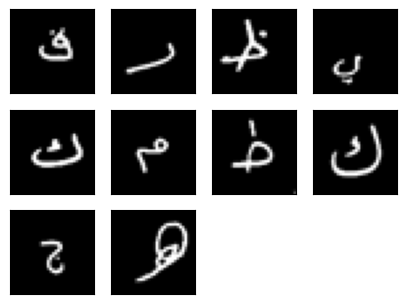

In [28]:
ra = np.random.randint(0, 13440, size=25)
plt.figure(figsize=(5, 5))
for i in range(10):
    plt.subplot(4, 4, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_train[ra[i]].reshape(32, 32).T, "gray")
plt.show()

In [29]:
x_train = x_train.reshape(-1, 32, 32, 1)
x_test = x_test.reshape(-1, 32, 32, 1)

In [30]:
x_train = x_train/255.0
x_test = x_test/255.0

In [31]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [32]:
num_classes = 28

In [34]:
model = Sequential()

model.add(Conv2D(32, (5, 5), padding="same", activation="relu", input_shape=(32, 32, 1)))
model.add(Conv2D(32, (5, 5), activation="relu"))
model.add(Conv2D(32, (5, 5), activation="relu"))
model.add(MaxPooling2D((2, 2)))
model.add(BatchNormalization())

model.add(Conv2D(64, (5, 5), padding="same", activation="relu"))
model.add(Conv2D(64, (5, 5), activation="relu"))
model.add(Conv2D(64, (5, 5), activation="relu"))
model.add(MaxPooling2D((2, 2)))
model.add(BatchNormalization())

model.add(Flatten())
model.add(Dense(128, activation="relu"))
model.add(Dense(128, activation="relu"))
model.add(Dropout(0.4))

model.add(Dense(num_classes, activation="softmax"))

In [35]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 32, 32, 32)        832       
                                                                 
 conv2d_4 (Conv2D)           (None, 28, 28, 32)        25632     
                                                                 
 conv2d_5 (Conv2D)           (None, 24, 24, 32)        25632     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 12, 12, 32)        0         
 g2D)                                                            
                                                                 
 batch_normalization_1 (Bat  (None, 12, 12, 32)        128       
 chNormalization)                                                
                                                                 
 conv2d_6 (Conv2D)           (None, 12, 12, 64)       

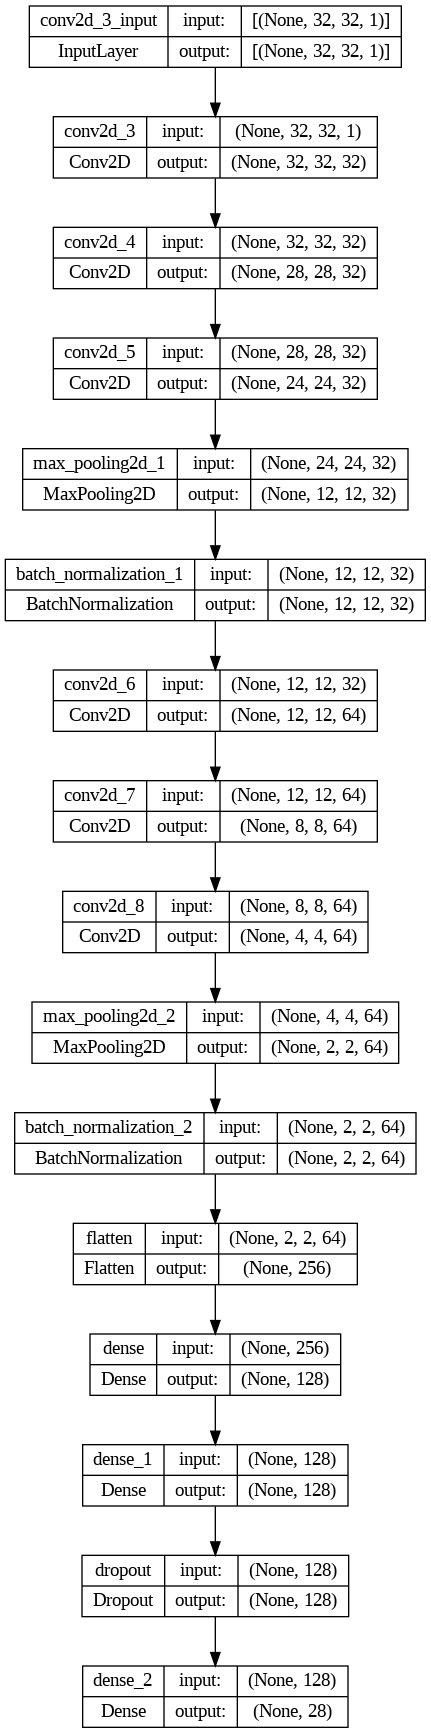

In [36]:
plot_model(model, to_file='mlp-mnist.png', show_shapes=True)

In [37]:
optimizer = Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999)

In [38]:
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

In [39]:
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.2,
    zoom_range=0.4,
    horizontal_flip=False,
    vertical_flip=False,
    fill_mode='nearest'
)

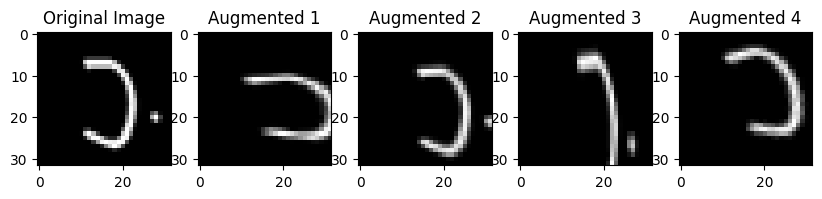

In [40]:
img = np.expand_dims(x_train[8], axis=0)

# Generate and plot augmented images
augmented_images = []

# Generate and plot augmented images
for batch in datagen.flow(img, batch_size=4):
    augmented_images.append(batch[0])
    if len(augmented_images) >= 4:
        break

# Plot the original and augmented images
plt.figure(figsize=(10, 5))
plt.subplot(151)
plt.imshow(img[0, :, :, 0], cmap='gray')
plt.title('Original Image')

for i in range(4):
    plt.subplot(152 + i)
    plt.imshow(augmented_images[i][:, :, 0], cmap='gray')  # Fix indexing here
    plt.title(f'Augmented {i+1}')

plt.show()

In [41]:
batch_size= 128
epochs=15

In [42]:
model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Epoch 1/15
95/95 [==============================] - 12s 33ms/step - loss: 0.1887 - accuracy: 0.1558 - val_loss: 0.1926 - val_accuracy: 0.0365
Epoch 2/15
95/95 [==============================] - 1s 13ms/step - loss: 0.0881 - accuracy: 0.5107 - val_loss: 0.2803 - val_accuracy: 0.0595
Epoch 3/15
95/95 [==============================] - 1s 13ms/step - loss: 0.0529 - accuracy: 0.7454 - val_loss: 0.3027 - val_accuracy: 0.0967
Epoch 4/15
95/95 [==============================] - 1s 13ms/step - loss: 0.0336 - accuracy: 0.8605 - val_loss: 0.1660 - val_accuracy: 0.3542
Epoch 5/15
95/95 [==============================] - 1s 13ms/step - loss: 0.0222 - accuracy: 0.9128 - val_loss: 0.0740 - val_accuracy: 0.6540
Epoch 6/15
95/95 [==============================] - 1s 13ms/step - loss: 0.0171 - accuracy: 0.9333 - val_loss: 0.0737 - val_accuracy: 0.6592
Epoch 7/15
95/95 [==============================] - 1s 13ms/step - loss: 0.0134 - accuracy: 0.9487 - val_loss: 0.0209 - val_accuracy: 0.9115
Epoch 8/15
9

In [43]:
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.015607330948114395
Test accuracy: 0.941649317741394
